In [82]:
import pandas as pd

df = pd.read_csv('../data/desafio_indicium_imdb.csv')

print('csv lido!')

csv lido!


In [83]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Iniciando tratamento dos dados.
- Corrigindo colunas
- Corrigindo dados que serão importantes no momento das operações matemáticas

In [85]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')#remove min e deixa o espaço vazio
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce') #converte a coluna para numérica, caso não consiga, deixa valores nulo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 125.0+ KB


In [86]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


In [87]:
#vamos remover a colunma Unnamed, pois ela não será utilizada na nossa analise explorária
df = df.drop(columns=['Unnamed: 0'])

df.head() #verificando se a coluna foi removida

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [88]:
df.isnull().sum() #verificando quantos valores nulos temos em cada coluna

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [89]:
#vamos utilizar a mediana para preencher os valores nulos na coluna Gross e Meta_score
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

print('valores nulos preenchidos!')

valores nulos preenchidos!


In [90]:
#agora com a coluna Certificate, vamos utilizar a moda, que são os valores que aparecem com mais frequência
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

In [91]:
df.info() #veirificando se ainda temos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 117.2+ KB


## Etapa 2
Para termos uma boa resposta da primeira pergunta da etapa 2. Antes, vamos analisar o motivo de indicarmos o filmes.

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
PProducitons, de acordo com os gráficos, podemos tornar claro as informações de que: O Número de votos, engajamento, é um fator crucial financeiramente. Quanto mais engajamento, mais pessoas vão assistir o filme e consequentemete gera mais lucro.
E, não podemos esquecer que o gênero também é um fator importante para que o faturamente do filme ocorra.

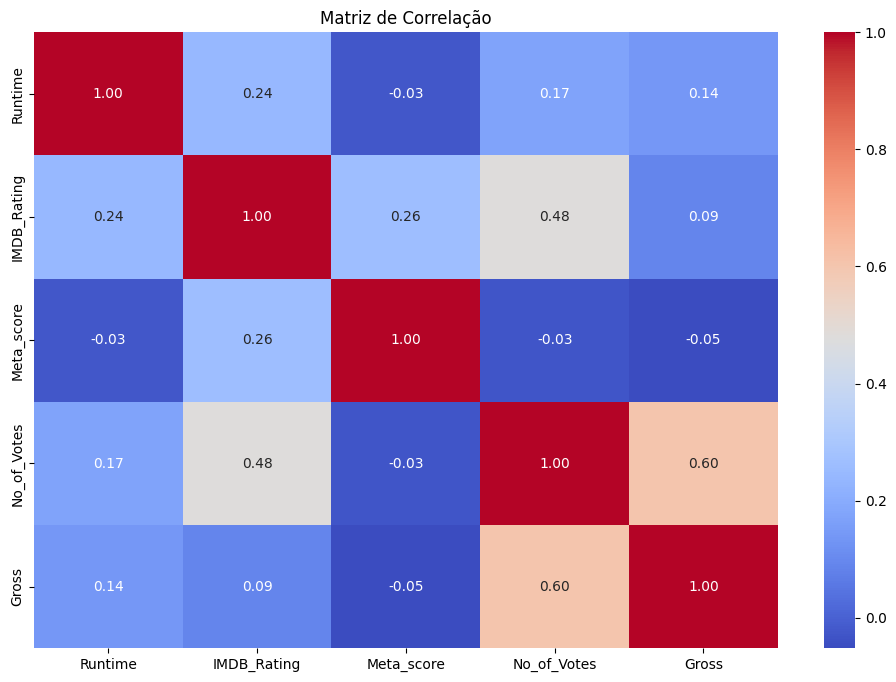

In [92]:
#Alternativa B - Análise de Faturamento

import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacao = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f') #criação do gráfico
plt.title('Matriz de Correlação')
plt.show()
#esse gráfico nos vai dar uma noção de quais colunas tem maior correlação com a coluna Gross, que é a nossa variável alvo.

In [93]:
#o número de votos não é a única coluna que estabelece motivos para um bom faturamento, vamos trabalhar com colunas não númericas (gêneros):

faturamento_por_genero = df.groupby('Genre')['Gross'].median().sort_values(ascending=False) #agrupa em tabelas e ordena em ordem decrescente
print(faturamento_por_genero.head(10))

Genre
Family, Sci-Fi                435110554.0
Action, Adventure, Fantasy    307269663.5
Action, Adventure, Family     301959197.0
Adventure, Fantasy            280685211.5
Adventure, Thriller           260000000.0
Animation, Comedy, Crime      251513985.0
Adventure, Family, Fantasy    249358727.0
Action, Adventure, Sci-Fi     233921534.0
Action, Adventure, Comedy     221660006.5
Action, Adventure, Mystery    209028679.0
Name: Gross, dtype: float64


In [94]:
#criar uma nova cópia do DataFrame para não alterar o original nesta etapa de descobrimos qual genero que gera mais faturamento
df_generos = df.copy()

df_generos['Genre'] = df_generos['Genre'].str.split(', ')

df_generos = df_generos.explode('Genre')

print(df_generos.head())

      Series_Title Released_Year Certificate  Runtime   Genre  IMDB_Rating  \
0    The Godfather          1972           A      175   Crime          9.2   
0    The Godfather          1972           A      175   Drama          9.2   
1  The Dark Knight          2008          UA      152  Action          9.0   
1  The Dark Knight          2008          UA      152   Crime          9.0   
1  The Dark Knight          2008          UA      152   Drama          9.0   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
1  When the menace known as the Joker wreaks havo...        84.0   
1  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1         Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando     Al Pac

In [95]:
#agora saberemos qual gênero individual gera mais faturamento
faturamento_por_genero_individual = df_generos.groupby('Genre')['Gross'].median().sort_values(ascending=False)

print(faturamento_por_genero_individual.head(10))

Genre
Adventure    64898511.00
Sci-Fi       57938693.00
Action       43000000.00
Biography    32572577.00
Family       31637200.00
History      23494165.75
Drama        23457439.50
Crime        23457439.50
Fantasy      23457439.50
Comedy       23457439.50
Name: Gross, dtype: float64


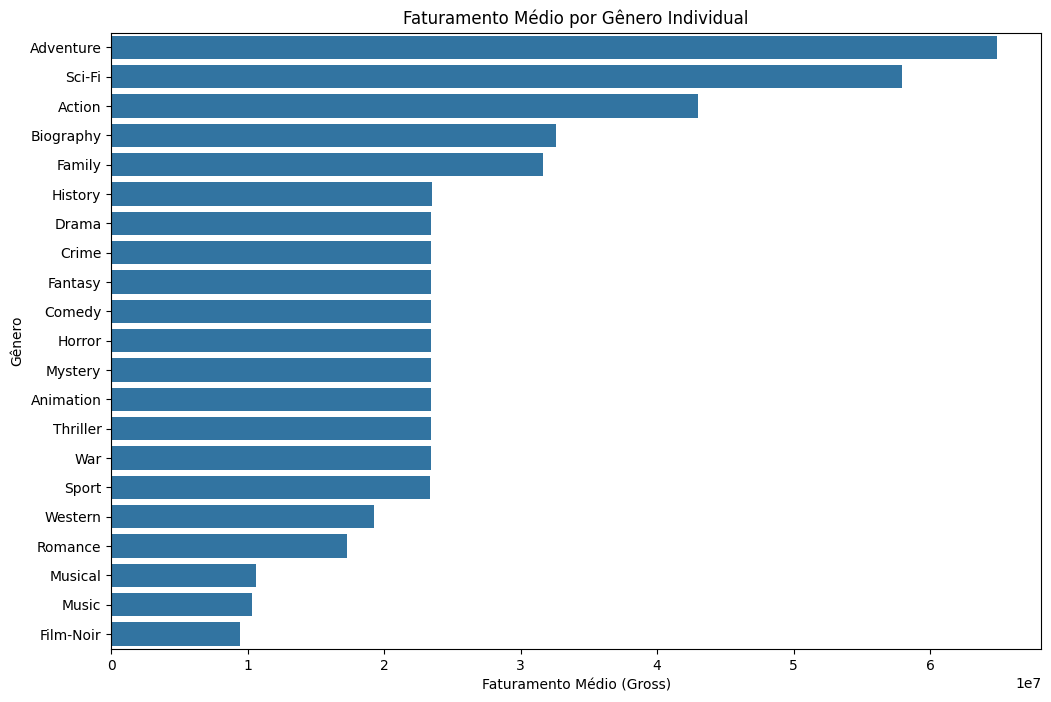

In [96]:
plt.figure(figsize=(12, 8))
sns.barplot(x=faturamento_por_genero_individual.values, y=faturamento_por_genero_individual.index)

plt.title('Faturamento Médio por Gênero Individual')
plt.xlabel('Faturamento Médio (Gross)')
plt.ylabel('Gênero')
plt.show()

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
PProductions, os insights que podem ser tirados da coluna Overview podemos enxergar nessa imagem da nuvem de palavras. As palavras maiores são as que mais se repetem. Assim, podemos também inferir o gênero do filme, podemos observar palavras como "world", "German", "American", etc. E, temos outro eixo, com palavras como "family", "love", "story", etc. Podendo ser, romance ou ação
Então o grande insight que podemos tirar dessas conclusões é que filmes de grandes sucessos giram entorno desses temas: relações humanas, histórias de vida, guerras e divergencias.

<function matplotlib.pyplot.show(close=None, block=None)>

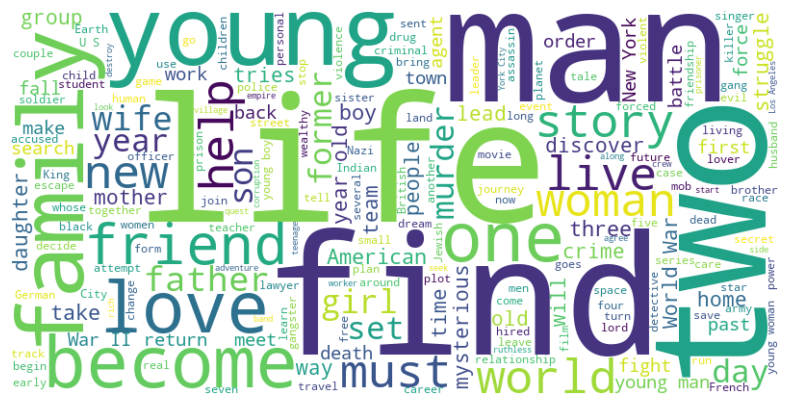

In [97]:
#Alternativa C - Insights a partir de Overview

#essa biblioteca ela vai pegar todas as palavras que estão na coluna Overview e criar uma nuvem de palavras, onde as palavras que aparecem mais vezes ficam maiores
from wordcloud import WordCloud

text = ' '.join(overview for overview in df['Overview'])

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

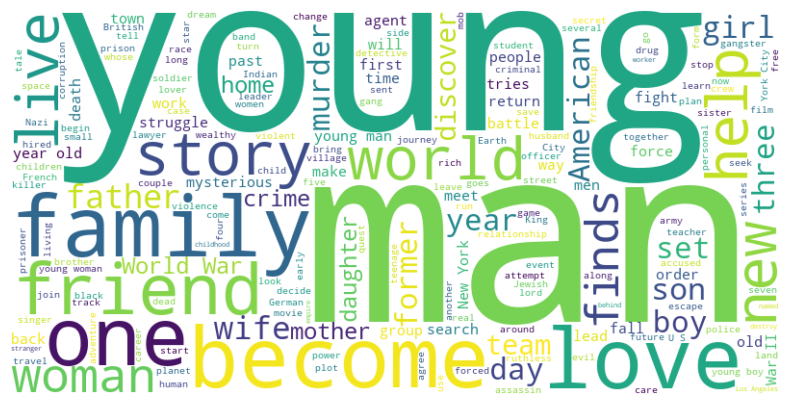

In [98]:
#vamos gerar o wordcloud novamente, mas agora removendo as palavras mais comuns em inglês (stopwords)
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['life', 'find', 'finds' 'one', 'two', 'take','takes', 'must', 'the', 'and', 'for', 'with',])


wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

### Qual filme você recomendaria para uma pessoa que você não conhece?
O filme que eu recomendaria para um desconhecido seria "The Godfather". Veja os dados abaixo para comprovar a maior nota dentre todos os filmes.

In [ ]:
#Alternativa A - Qual filme eu recomendaria para uma pessoa desconhecida?

df_pred = df.copy()

# Trate colunas numéricas
df_pred['Runtime'] = df_pred['Runtime'].astype(str).str.replace(' min', '')
df_pred['Runtime'] = pd.to_numeric(df_pred['Runtime'], errors='coerce')
df_pred['Gross'] = df_pred['Gross'].astype(str).str.replace(',', '')
df_pred['Gross'] = pd.to_numeric(df_pred['Gross'], errors='coerce')

df_pred = pd.get_dummies(df_pred, drop_first=True)

for col in X.columns:
    if col not in df_pred.columns:
        df_pred[col] = 0

df_pred = df_pred[X.columns]

df['IMDB_Predicted'] = linear_model.predict(df_pred)

melhor_filme = df.loc[df['IMDB_Predicted'].idxmax()]

print("Filme recomendado considerando todas as colunas essenciais:")
print(f"Título: {melhor_filme['Series_Title']}")
print(f"Ano: {melhor_filme['Released_Year']}")
print(f"Gênero: {melhor_filme['Genre']}")
print(f"Nota prevista IMDB: {melhor_filme['IMDB_Predicted']:.2f}")

Filme recomendado considerando todas as colunas essenciais:
Título: The Godfather
Ano: 1972
Gênero: Crime, Drama
Nota prevista IMDB: 9.20


## Etapa 3
3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? 
- Vamos utilizar Meta_score, No_of_Votes, Runtime, Gross e Genre com One-Hot Encoding. Porque, essas são as colunas mais favoráveis para ter um julgamento para prever a nota do imdb.

Qual tipo de problema estamos resolvendo (regressão, classificação)?
- Regressão

Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 
- modelo de regressão linear. Prós: simples de ser utilizado e rápido raciocínio. 
Contra: Ele não captura a complexidade dos dados e os resultados podem ser facilmente influenciados

Qual medida de performance do modelo foi escolhida e por quê?
- Foi o Erro Médio Absoluto (MAE). Porque, tem muita estabilidade a partir de muitos dados.

In [ ]:
#vamos usar nosso df_generos que criamos anteriormente para descobrir qual gênero tem mais palavras em comum na coluna Overview, pois cada gênero já está separado individualmente
features = [col for col in df_generos.columns if col != 'IMDB_Rating']
target = 'IMDB_Rating'

df_model = df_generos[features + [target]].copy() #criamos uma cópia do df_generos com as colunas que queremos trabalhar

df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop(columns=target)
y = df_model[target]

print('Features', X.shape)
print('Gênero', y.shape)
print(X.head())

Features (2540, 6003)
Gênero (2540,)
   Runtime  Meta_score  No_of_Votes        Gross  Series_Title_12 Angry Men  \
0      175       100.0      1620367  134966411.0                      False   
0      175       100.0      1620367  134966411.0                      False   
1      152        84.0      2303232  534858444.0                      False   
1      152        84.0      2303232  534858444.0                      False   
1      152        84.0      2303232  534858444.0                      False   

   Series_Title_12 Years a Slave  Series_Title_1917  \
0                          False              False   
0                          False              False   
1                          False              False   
1                          False              False   
1                          False              False   

   Series_Title_2001: A Space Odyssey  Series_Title_21 Grams  \
0                               False                  False   
0                            

In [ ]:
#agora vamos dividir os dados em treino e teste, para que possamos treinar nosso modelo e depois testá-lo com dados que ele nunca viu antes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Dados divididos em treino:', X_train.shape)
print('Dados divididos em teste:', X_test.shape)

Dados divididos em treino: (2032, 6003)
Dados divididos em teste: (508, 6003)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

print('Modelo treinado!')

y_pred = linear_model.predict(X_test)

Modelo treinado!


In [ ]:
#agora vamos avaliar o modelo utilizando o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 0.01153708140050805


### Etapa 4: prever imdb do filme abaixo

In [ ]:
#Agora vamos prever a nota IMDB do filme The Shawshank Redemption

shawshank = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
 }

df_shawshank = pd.DataFrame([shawshank])

print("Dados do filme:\n ", df_shawshank)


Dados do filme:
                 Series_Title Released_Year Certificate  Runtime  Genre  \
0  The Shawshank Redemption          1994           A  142 min  Drama   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   

         Director        Star1           Star2       Star3           Star4  \
0  Frank Darabont  Tim Robbins  Morgan Freeman  Bob Gunton  William Sadler   

   No_of_Votes       Gross  
0      2343110  28,341,469  


In [ ]:
df_shawshank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1 non-null      object 
 1   Released_Year  1 non-null      object 
 2   Certificate    1 non-null      object 
 3   Runtime        1 non-null      object 
 4   Genre          1 non-null      object 
 5   Overview       1 non-null      object 
 6   Meta_score     1 non-null      float64
 7   Director       1 non-null      object 
 8   Star1          1 non-null      object 
 9   Star2          1 non-null      object 
 10  Star3          1 non-null      object 
 11  Star4          1 non-null      object 
 12  No_of_Votes    1 non-null      int64  
 13  Gross          1 non-null      object 
dtypes: float64(1), int64(1), object(12)
memory usage: 244.0+ bytes


In [ ]:
#Vamos preparar os dados do filme para que possamos fazer a previsão
#Vamos transforma a coluna Runtime e Gross em numéricas, assim como fizemos com o df original

df_shawshank['Runtime'] = df_shawshank['Runtime'].str.replace(' min', '')
df_shawshank['Runtime'] = pd.to_numeric(df_shawshank['Runtime'], errors='coerce')

df_shawshank['Gross'] = df_shawshank['Gross'].str.replace(',', '')
df_shawshank['Gross'] = pd.to_numeric(df_shawshank['Gross'], errors='coerce')

df_shawshank.info()#confirmando se os dados passaram por todas as transformações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1 non-null      object 
 1   Released_Year  1 non-null      object 
 2   Certificate    1 non-null      object 
 3   Runtime        1 non-null      int64  
 4   Genre          1 non-null      object 
 5   Overview       1 non-null      object 
 6   Meta_score     1 non-null      float64
 7   Director       1 non-null      object 
 8   Star1          1 non-null      object 
 9   Star2          1 non-null      object 
 10  Star3          1 non-null      object 
 11  Star4          1 non-null      object 
 12  No_of_Votes    1 non-null      int64  
 13  Gross          1 non-null      int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 244.0+ bytes


In [ ]:
#agora vamos realizar a previsão do IMDB, da mesma maneira que fizemos com o df_model

df_shawshank = pd.get_dummies(df_shawshank, drop_first=True)

#garantindo que todas as colunas do df_shawshank tenham o mesmo treinamento
for col in X.columns:
    if col not in df_shawshank.columns:
        df_shawshank[col] = 0

df_shawshank = df_shawshank[X.columns] #reordena as colunas para que fiquem na mesma ordem do X

previsao = linear_model.predict(df_shawshank)
print(f"\n\033[1mA nota prevista do IMDB para o filme é: {previsao[0]:.2f}")


A nota prevista do IMDB para o filme é: 9.54
